In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from datasets.ascad_datasets import AscadDataset

In [2]:
train_dataset = AscadDataset(train=True)

mean_trace = torch.zeros(train_dataset.trace_shape)
for idx, (trace, _) in enumerate(train_dataset):
    mean_trace = (idx/(idx+1))*mean_trace + (1/(idx+1))*trace

mean_traces = {}
for idx, (trace, label) in enumerate(train_dataset):
    if not(label in mean_traces.keys()):
        mean_traces[label] = [torch.zeros(train_dataset.trace_shape), 0]
    n = mean_traces[label][1]
    mean_traces[label][0] = (n/(n+1))*mean_traces[label][0] + (1/(n+1))*trace
    mean_traces[label][1] += 1

Text(0.5, 1.0, 'Full dataset mean')

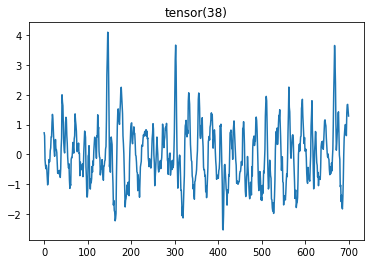

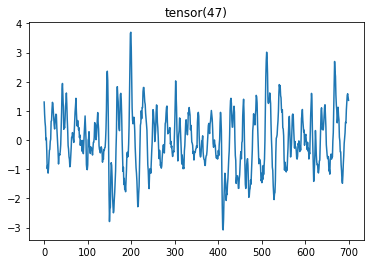

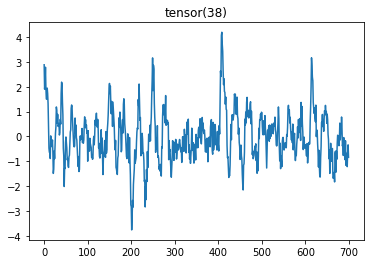

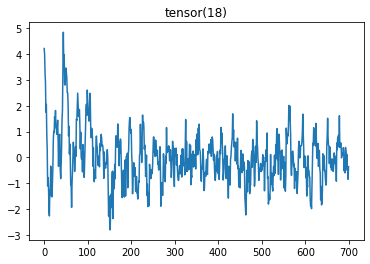

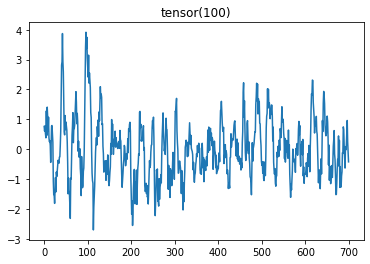

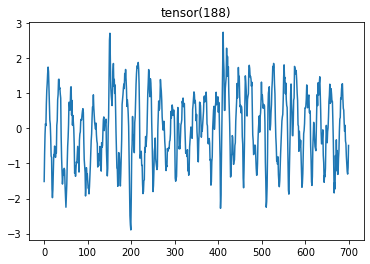

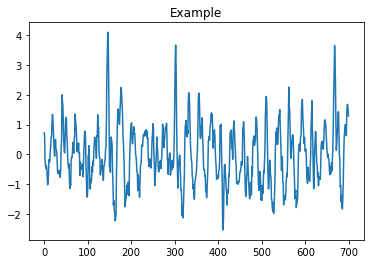

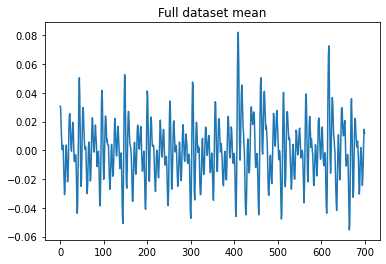

In [3]:
i = 0
for label, [trace, _] in mean_traces.items():
    plt.figure()
    plt.plot(trace.squeeze())
    plt.title(label)
    i += 1
    if i == 6:
        break

trace, _ = train_dataset[0]
plt.figure()
plt.plot(trace.squeeze())
plt.title('Example')

plt.figure()
plt.plot(mean_trace.squeeze())
plt.title('Full dataset mean')